In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# custom functions
from functions import *

2024-11-11 21:15:25.497097: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731356125.515290   12384 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731356125.520881   12384 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 21:15:25.537846: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/michael/.pyenv/versions/funnypress-data-study/lib/python3.12/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: 

In [2]:
df = pd.read_csv('../data/clean/dataset.csv').fillna('').sample(frac=1).reset_index(drop=True)

In [3]:
df

,name,url,title,lemmes,funny
0,franceinfotv,https://www.francetvinfo.fr/les-jeux-olympique...,"Paris 2024 : avec la cérémonie de clôture, les...",paris ceremonie cloture jeu olympique terminer...,0
1,le_parisien,https://www.leparisien.fr/environnement/climat...,Le charbon toujours plus utilisé dans le mond...,charbon utilise monde malgre responsabilite re...,0
2,liberation,https://www.liberation.fr/culture/jeux-video/s...,Silence on joue ! La 18e saison commence avec ...,silence joue saison commencer star wars outlaw...,0
3,huffpost,https://www.huffingtonpost.fr/actualites/artic...,Catho Style: des catholiques français réalis...,catho style catholique francai realiser parodi...,1
4,huffpost,https://www.huffingtonpost.fr/life/article/con...,Conseils pour le mec qui va me demander en mar...,conseil mec demander mariage,1
...,...,...,...,...,...
102080,la_depeche,https://www.ladepeche.fr/2024/10/19/editorial-...,ÉDITORIAL. Pesticides : la menace invisible,editorial pesticides menace invisible,0
102081,le_parisien,https://www.leparisien.fr/faits-divers/espagne...,Espagne : un « faux Brad Pitt » soutire 325 00...,espagne faux brad pitt soutirer euro femme eta...,0
102082,franceinfotv,https://www.francetvinfo.fr/sante/alimentation...,Ferrero va commercialiser en Europe une versio...,ferrero commercialiser europe version vegan nu...,0
102083,rfi,https://www.rfi.fr/fr/podcasts/journal-des-spo...,Jeux olympiques: la France vainqueure des Etat...,jeu olympique france vainqueure etats-unis foo...,0


In [4]:
X = CountVectorizer().fit_transform(df.lemmes)

In [5]:
X.shape

(102085, 47545)

In [6]:
X = CountVectorizer(min_df=50).fit_transform(df.lemmes)

In [7]:
X.shape

(102085, 2854)

In [8]:
X.toarray().shape

(102085, 2854)

In [9]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<Figure size 800x600 with 0 Axes>

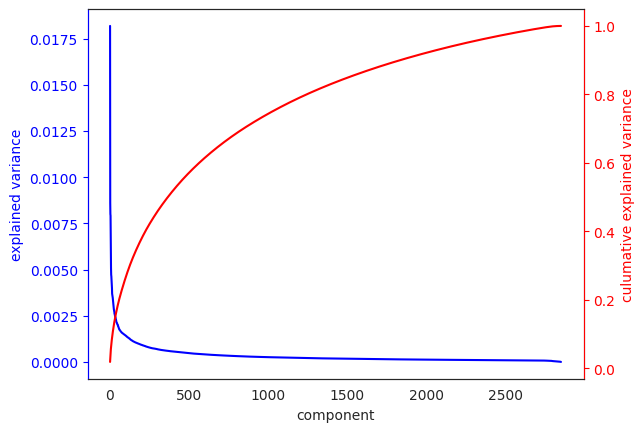

In [10]:
pca_graph(X.toarray())

In [11]:
y = df.funny

In [12]:
mapper = umap.UMAP(n_components=2, n_jobs=-1, verbose=1).fit(X)    

UMAP( verbose=1)
Mon Nov 11 21:17:41 2024 Construct fuzzy simplicial set
Mon Nov 11 21:17:41 2024 Finding Nearest Neighbors
Mon Nov 11 21:17:41 2024 Building RP forest with 21 trees
Mon Nov 11 21:18:01 2024 metric NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	Stopping threshold met -- exiting after 6 iterations
Mon Nov 11 21:18:34 2024 Finished Nearest Neighbor Search
Mon Nov 11 21:18:38 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon Nov 11 21:19:39 2024 Finished embedding


<Axes: >

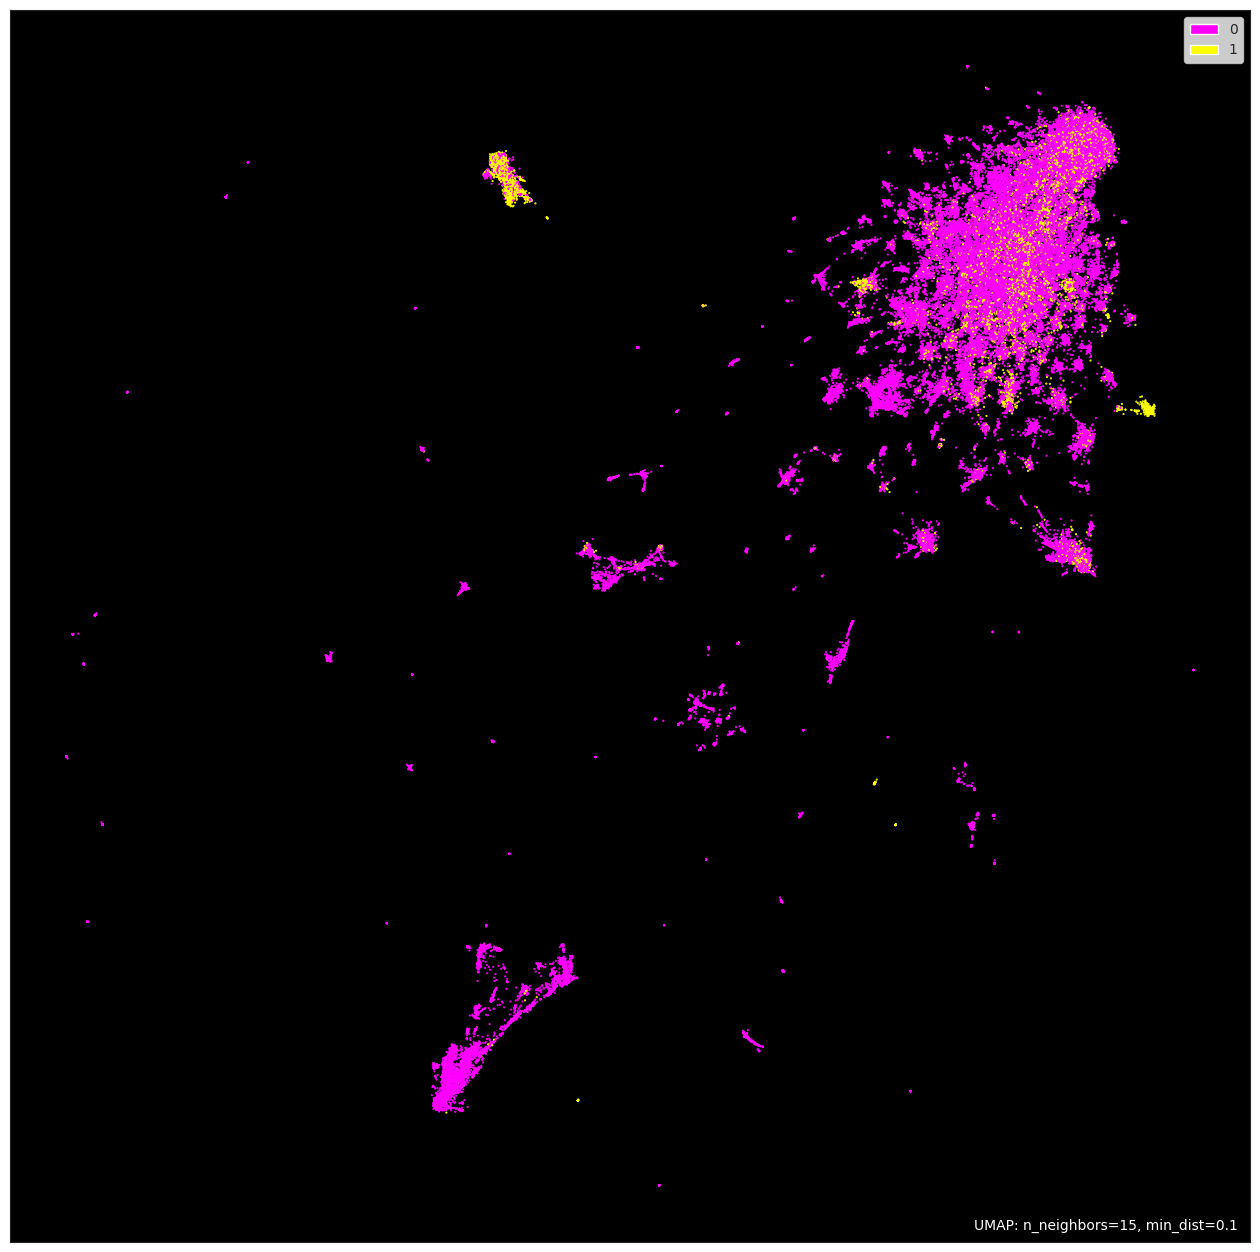

In [13]:
umap.plot.points(mapper, labels=y, background='black', color_key_cmap='spring', width=1600, height=1600)